In [1]:
import numpy as np
import pandas as pd
import requests 
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [2]:
url = "https://www.acbsp.org/page/membership_list"
html_content = requests.get(url).text
soup = BeautifulSoup(html_content, "lxml")
print(soup.prettify()[:500])

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <script type="text/javascript">
   window.NREUM||(NREUM={});NREUM.info = {"beacon":"bam.nr-data.net","errorBeacon":"bam.nr-data.net","licenseKey":"fbe52127be","applicationID":"110202938","transactionName":"b1FaNUtUV0dWV0xYClYbbRNQGl5RWVFKUAkXV00STVpUGlZHSA==","queueTime":0,"applicationTime":224,"agent":"","atts":""}
  </script>
  <script type="text/javascript">
   (window


In [3]:
my_table = soup.find("table",{"id":"member-table"})
print(my_table.prettify()[:300])

<table class="table sortable" id="member-table">
 <thead>
  <tr class="tableizer-firstrow">
   <th class="col-sm-3">
    Institution
   </th>
   <th class="col-sm-2">
    City
   </th>
   <th class="col-sm-2">
    State/Province
   </th>
   <th class="col-sm-2">
    Country
   </th>
   <th class="co


In [4]:
my_thead = my_table.find("thead")
my_thead

<thead>
<tr class="tableizer-firstrow">
<th class="col-sm-3">
                Institution
            </th>
<th class="col-sm-2">
                City
            </th>
<th class="col-sm-2">
                State/Province
            </th>
<th class="col-sm-2">
                Country
            </th>
<th class="col-sm-1">
                Status
            </th>
<th class="col-sm-1">
                Level
            </th>
<th class="col-sm-1">
                Region
            </th>
</tr>
</thead>

In [5]:
my_ths = my_thead.find_all("th")
my_ths

[<th class="col-sm-3">
                 Institution
             </th>, <th class="col-sm-2">
                 City
             </th>, <th class="col-sm-2">
                 State/Province
             </th>, <th class="col-sm-2">
                 Country
             </th>, <th class="col-sm-1">
                 Status
             </th>, <th class="col-sm-1">
                 Level
             </th>, <th class="col-sm-1">
                 Region
             </th>]

In [6]:
column_names = []
for th in my_ths:
    column_names.append(th.text.strip())
column_names

['Institution',
 'City',
 'State/Province',
 'Country',
 'Status',
 'Level',
 'Region']

In [7]:
column_names[2] = "State"

In [8]:
my_rows = my_table.tbody.find_all("tr")
my_rows[:3]

[<tr>
 <td><a href="https://www.acbsp.org/members/?id=27157770">ABMS Switzerland</a></td>
 <td>Zurich</td>
 <td></td>
 <td>Switzerland</td>
 <td>C</td>
 <td>B/G</td>
 <td>8</td>
 </tr>, <tr>
 <td><a href="https://www.acbsp.org/members/?id=30959680">ADA University</a></td>
 <td>Baku</td>
 <td></td>
 <td>Azerbaijan</td>
 <td>M</td>
 <td>B/G</td>
 <td>8</td>
 </tr>, <tr>
 <td><a href="https://www.acbsp.org/members/?id=21779567">Adams State University</a></td>
 <td>Alamosa</td>
 <td>Colorado</td>
 <td>United States</td>
 <td>M</td>
 <td>B/G</td>
 <td>7</td>
 </tr>]

In [9]:
rows = []
for tr in my_rows:
    columns = []
    for td in tr.find_all("td"):
        columns.append(td.text.strip())
    rows.append(columns)
rows[:2]

[['ABMS Switzerland', 'Zurich', '', 'Switzerland', 'C', 'B/G', '8'],
 ['ADA University', 'Baku', '', 'Azerbaijan', 'M', 'B/G', '8']]

In [10]:
df = pd.DataFrame(rows)
df.head(10)

,0,1,2,3,4,5,6
0,ABMS Switzerland,Zurich,,Switzerland,C,B/G,8
1,ADA University,Baku,,Azerbaijan,M,B/G,8
2,Adams State University,Alamosa,Colorado,United States,M,B/G,7
3,ADEN University - Argentina,Mendoza,,Argentina,A,B/G,9
4,ADEN University - El Salvador,San Salvador,,El Salvador,A,B/G,9
5,ADEN University - Panama,Ciudad de Panama,,Panama,A,B/G,9
6,Aiken Technical College,Aiken,South Carolina,United States,A,A,3
7,Al Khawarizmi International College (KIC),Abu Dhabi,,United Arab Emirates,M,A/B/G,8
8,Alabama State University,Montgomery,Alabama,United States,A,B/G,3
9,Albany State University,Albany,Georgia,United States,A,B/G,3


In [11]:
df.columns = column_names
df.head()

,Institution,City,State,Country,Status,Level,Region
0,ABMS Switzerland,Zurich,,Switzerland,C,B/G,8
1,ADA University,Baku,,Azerbaijan,M,B/G,8
2,Adams State University,Alamosa,Colorado,United States,M,B/G,7
3,ADEN University - Argentina,Mendoza,,Argentina,A,B/G,9
4,ADEN University - El Salvador,San Salvador,,El Salvador,A,B/G,9


In [42]:
agg = df[df["Country"] == "United States"].groupby("Status")["Institution"].count().sort_values()
agg

Status
M     31
C     67
A    804
Name: Institution, dtype: int64

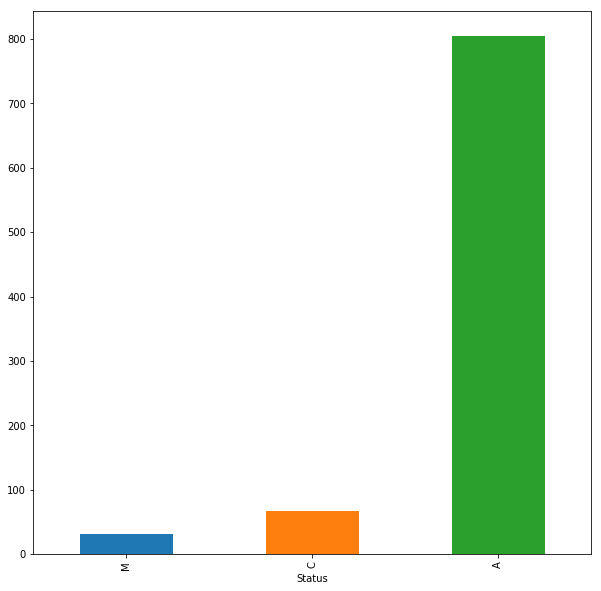

In [43]:
fig, ax = plt.subplots(figsize=(10,10))
agg.plot.bar(ax=ax)

In [12]:
agg = df[df["Country"] != "United States"].groupby("Country")["Institution"].count().sort_values()
agg

Country
Lebanon                      1
Romania                      1
Honduras                     1
Hungary                      1
Slovak Republic              1
Italy                        1
Korea, South                 1
Greece                       1
Singapore                    1
Malaysia                     1
Russia                       1
Morocco                      1
Nicaragua                    1
Oman                         1
Pakistan                     1
Macedonia                    1
South Africa                 1
Guatemala                    1
Turkey                       1
Australia                    1
Azerbaijan                   1
Turks and Caicos Islands     1
El Salvador                  1
Chile                        1
Thailand                     1
Qatar                        1
Curacao                      1
Cyprus                       1
Suriname                     1
Kazakhstan                   2
Paraguay                     2
Argentina                    2


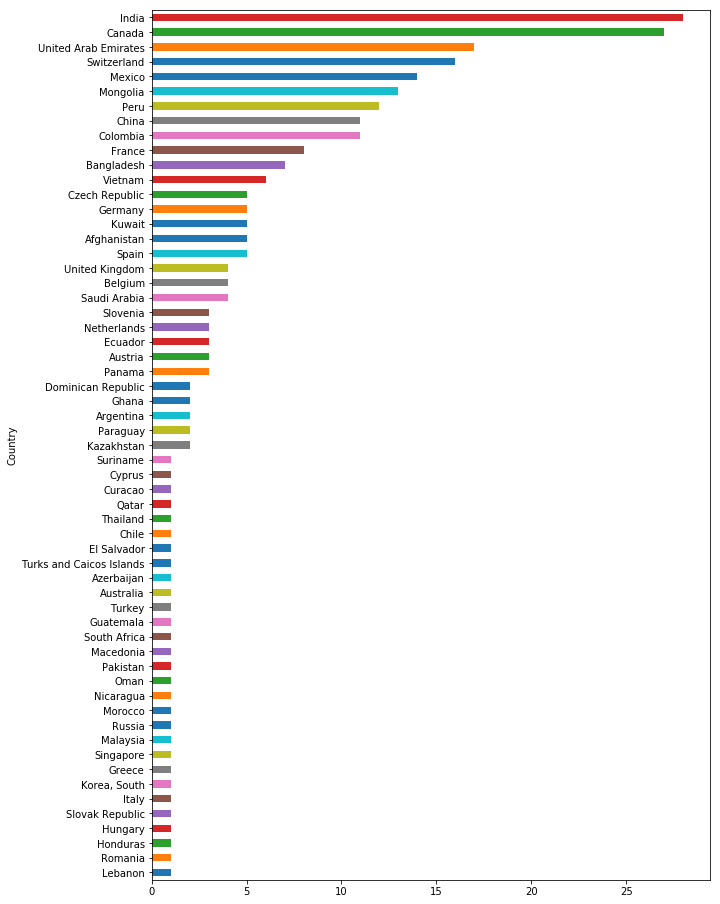

In [13]:
fig, ax = plt.subplots(figsize=(10,16))
agg.plot.barh(ax=ax)

In [14]:
agg2 = df[df["Country"] == "United States"].groupby("State")["Institution"].count().sort_values()
agg2

State
                             1
Virgin Islands               1
Rhode Island                 1
Northern Mariana Islands     1
North Dakota                 1
Montana                      1
Deleware                     1
Vermont                      2
District of Colombia         2
Delaware                     2
Wyoming                      2
Alaska                       3
Idaho                        3
Califonia                    3
Maine                        3
Connecticut                  4
South Dakota                 4
Iowa                         4
D. C.                        4
Nebraska                     4
Oregon                       5
Nevada                       5
Massachusetts                5
Hawaii                       6
Utah                         7
Illiniois                    7
Mississippi                  8
Kentucky                     8
Michigan                     9
Wisconsin                    9
Louisiana                   10
New Hampshire               10
Wa

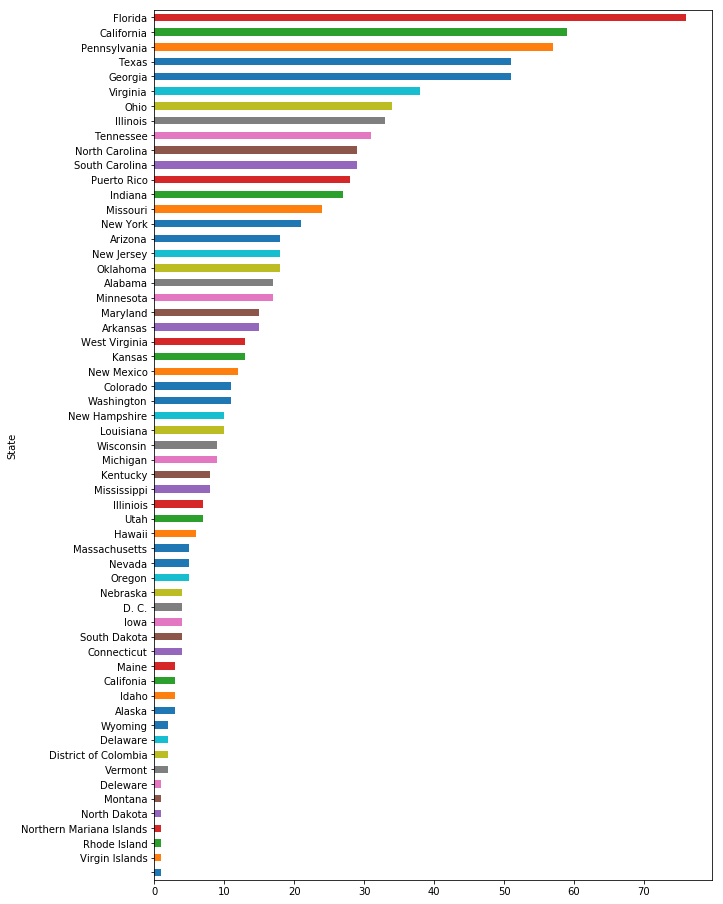

In [15]:
fig, ax = plt.subplots(figsize=(10,16))
agg2.plot.barh(ax=ax)

In [16]:
df[ (df["State"] == "") & (df["Country"] == "United States") ]

,Institution,City,State,Country,Status,Level,Region
419,Hood College,Frederick,,United States,A,B/G,2


In [17]:
df.loc[ (df["State"] == "") & (df["Country"] == "United States"), "State" ] = "Maryland"
df[ (df["State"] == "") & (df["Country"] == "United States") ]

,Institution,City,State,Country,Status,Level,Region


In [18]:
df_us = df[df["Country"] == "United States"]
df_us.shape

(902, 7)

In [24]:
df_us["Institution2"] = df_us["Institution"].apply(lambda x: x.split("-")[0] if len(x.split("-")) > 1 else x)
df_us

C:\Users\jay\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Institution,City,State,Country,Status,Level,Region,Institution2
2,Adams State University,Alamosa,Colorado,United States,M,B/G,7,Adams State University
6,Aiken Technical College,Aiken,South Carolina,United States,A,A,3,Aiken Technical College
8,Alabama State University,Montgomery,Alabama,United States,A,B/G,3,Alabama State University
9,Albany State University,Albany,Georgia,United States,A,B/G,3,Albany State University
10,Alcorn State University,Lorman,Mississippi,United States,A,B/G,3,Alcorn State University
11,"Alcorn State University - Natchez, MS",Natchez,Mississippi,United States,A,B/G,3,Alcorn State University
13,Alliant International University,San Diego,California,United States,A,B/G,7,Alliant International University
15,Alpena Community College,Alpena,Michigan,United States,C,A,4,Alpena Community College
16,Alvernia University,Reading,Pennsylvania,United States,A,B/G,2,Alvernia University
17,Amberton University,Garland,Texas,United States,C,B/G,6,Amberton University


In [20]:
df_sc = pd.read_csv("MERGED2017_18_PP.csv", usecols=["UNITID", "INSTNM", "CITY", "STABBR"])
df_sc.head()

,UNITID,INSTNM,CITY,STABBR
0,100654,Alabama A & M University,Normal,AL
1,100663,University of Alabama at Birmingham,Birmingham,AL
2,100690,Amridge University,Montgomery,AL
3,100706,University of Alabama in Huntsville,Huntsville,AL
4,100724,Alabama State University,Montgomery,AL


In [36]:
df_merge = pd.merge(df_us, df_sc, left_on=["Institution", "City"], right_on=["INSTNM", "CITY"], how="left")
df_merge.shape

(906, 12)

In [37]:
df_merge[df_merge["UNITID"].isnull()] 

,Institution,City,State,Country,Status,Level,Region,Institution2,UNITID,INSTNM,CITY,STABBR
1,Aiken Technical College,Aiken,South Carolina,United States,A,A,3,Aiken Technical College,NaN,NaN,NaN,NaN
4,Alcorn State University,Lorman,Mississippi,United States,A,B/G,3,Alcorn State University,NaN,NaN,NaN,NaN
5,"Alcorn State University - Natchez, MS",Natchez,Mississippi,United States,A,B/G,3,Alcorn State University,NaN,NaN,NaN,NaN
6,Alliant International University,San Diego,California,United States,A,B/G,7,Alliant International University,NaN,NaN,NaN,NaN
10,American InterContinental University - Atlanta...,Atlanta,Georgia,United States,A,A/B/G,3,American InterContinental University,NaN,NaN,NaN,NaN
11,American InterContinental University - Houston...,Houston,Texas,United States,A,A/B/G,6,American InterContinental University,NaN,NaN,NaN,NaN
12,American InterContinental University (Main),Schaumburg,Illinois,United States,A,A/B/G,4,American InterContinental University (Main),NaN,NaN,NaN,NaN
27,Austin Community College,Austin,Texas,United States,A,A,6,Austin Community College,NaN,NaN,NaN,NaN
29,Baker University School of Professional & Grad...,Overland Park,Kansas,United States,C,B/G,5,Baker University School of Professional & Grad...,NaN,NaN,NaN,NaN
35,Bethel University,St. Paul,Minnesota,United States,A,B/G,4,Bethel University,NaN,NaN,NaN,NaN


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1163 entries, 0 to 1162
Data columns (total 7 columns):
Institution    1163 non-null object
City           1163 non-null object
State          1163 non-null object
Country        1163 non-null object
Status         1163 non-null object
Level          1163 non-null object
Region         1163 non-null object
dtypes: object(7)
memory usage: 63.7+ KB


In [70]:
df.to_csv("./output/ACBSP.csv")

The END